## Proof of Concept: NLP Sentiment Analysis using Amazon Review data

#### 1.0.   INTRODUCTION TO SENTIMENT ANALYSIS

Sentiment analysis is contextual text mining that recognizes and extracts subjective information from source material. It assists businesses in understanding the social sentiment of their brands, products, and services while keeping an eye on online discussions. Recent developments in deep learning have greatly increased algorithms' capacity for text analysis. The inventive application of cutting-edge artificial intelligence methods can be a useful instrument for doing in-depth study (Gupta, 2018).

The most popular text categorization tool, sentiment analysis determines if an incoming message's underlying sentiment is favorable, negative, or neutral. For this research, Amazon data which contains review of products purchases will be used to perform this analysis.

#### 2.0. DATASET AND PURPOSE OF ANALYSIS

Customers frequently have more knowledge of the services and goods that a company may be lacking. Understanding customer complaints can enable businesses to better understand the requirements and concerns of their clients (Trupp Global, 2021). Therefore, the purpose of this analysis is to determine the companies with most complains, and find patterns to improve the products and services they offer.

The data set is derived from Kaggle which contains user and product ID, profile name of customer, score, time, summary and the actual review in text form. This data will be used to perform sentiment analysis on the general polarity and subjectivity of Amazon customers.

#### 3.0. ANALYSIS SECTION

To perform the analysis, several packages will be used while explanation will be given along the analysis. First data will be imported and analyzed in the form of exploratory data analysis (EDA), data cleaning, and sentiment analysis of reviews in the dataset.

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
# import expression library
import re

##### Data was downloaded from Kaggle (also available in Github).

In [2]:
from google.colab import files
uploaded = files.upload()

import io
review = pd.read_csv(io.BytesIO(uploaded['Reviews.csv']))
review.head(4)

Saving Reviews.csv to Reviews.csv


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...


##### 3.1. Exlporatory Data Analysis

Given this type of data, the visualizations applicable for this data are box plot, correlation plot and word cloud to show the count of most common words from the dataset.



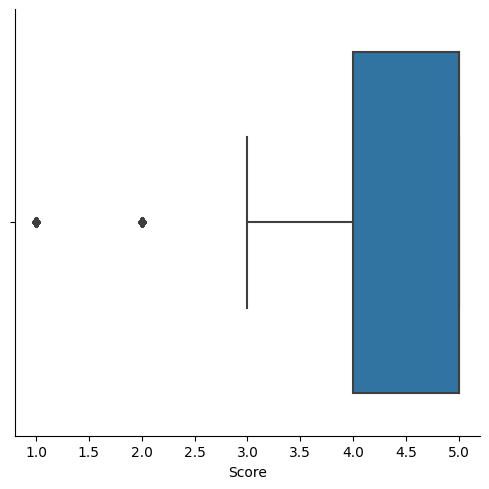

In [3]:
# Box plot of review score
sns.catplot(x='Score', kind='box', data=review)

<ipython-input-4-b2dcb9af2bdd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = review.corr()


<Axes: >

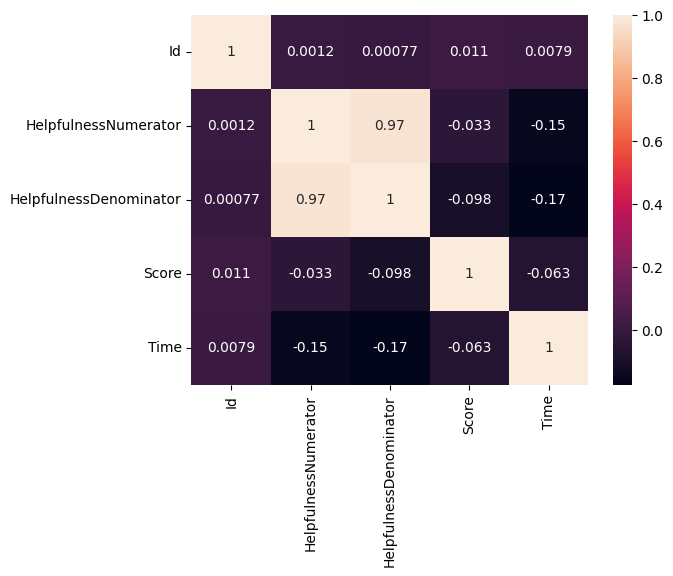

In [4]:
# correlation of numerical variables
correlation = review.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,
           annot=True)

##### Wordcloud

In [5]:
# create new variable from dataset
Text = review['Text']

In [6]:
#Remove punctuations
Text['text_processed'] = \
Text.map(lambda x: re.sub('[+""-:@$#%</>,\.!?]', '', x))

Text['text_processed'].head()

<ipython-input-6-62f07a604b0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Text['text_processed'] = \


0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price  There was a wide...
Name: Text, dtype: object

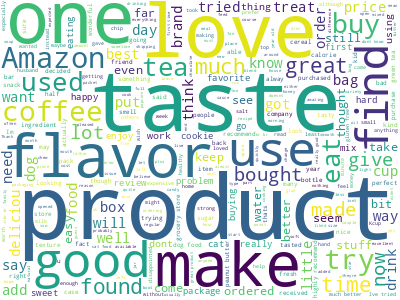

In [7]:
long_string = ','.join(list(Text['text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=28, height=300, contour_color='Set1')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

##### 3.2. Data Cleaning

This section includes wrangling the available dataset such as replacing or removing missing values, changing data type, etc. For this analysis, we would focus on missing values which will mostly include replacing missing values with the mode of the columns. Profile names and summary contains missing values, this were replaced with the mode of each column as aforementioned. However, for this analysis, we would focus on the text column for the sentiment analysis.

In [8]:
review[['ProfileName']] = review[['ProfileName']].fillna(review[['ProfileName']].mode().iloc[0])
review[['Summary']] = review[['Summary']].fillna(review[['Summary']].mode().iloc[0])

##### 3.3. Determine subjectivity and polarity

A Natural Language Processing (NLP) library written in Python, TextBlob actively utilized NLTK to complete its objectives. The subjectivity and polarity of a sentence are returned by TextBlob. The range of polarity is [-1,1], where [-1] indicates a negative feeling and [1] indicates a good one. Words that are negative flip the polarity. To continue with this analysis, we will determine the subjectivity or polarity of the text column of the dataset to determine the positive or negetive reviews. To proceed, TextBlob has been imported above, next we will define the subjectivity and polarity function.

In [9]:
# Convert Text to dataframe
Text_1 = pd.DataFrame(Text)

# Create function for subjectivity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#function for polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

Text_1['Subjectivity'] = review['Text'].apply(get_subjectivity)
Text_1['Polarity'] = review['Text'].apply(get_polarity)

Text_1.head(4)

,Text,Subjectivity,Polarity
0,I have bought several of the Vitality canned d...,0.433333,0.450000
1,Product arrived labeled as Jumbo Salted Peanut...,0.762963,-0.033333
2,This is a confection that has been around a fe...,0.448571,0.133571
3,If you are looking for the secret ingredient i...,0.533333,0.166667


3.4. Determine positive, negative or neutral sentiments

In [10]:
# Function for positive, negative and neutral
def get_score(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

Text_1['Sentiment'] = Text_1['Polarity'].apply(get_score)
Text_1.head(4)

,Text,Subjectivity,Polarity,Sentiment
0,I have bought several of the Vitality canned d...,0.433333,0.450000,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,0.762963,-0.033333,Negative
2,This is a confection that has been around a fe...,0.448571,0.133571,Positive
3,If you are looking for the secret ingredient i...,0.533333,0.166667,Positive


In [11]:
# Count value of sentiment
Text_1["Sentiment"].value_counts()

Positive    502017
Negative     58051
Neutral       8387
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Percent of each sentiment')

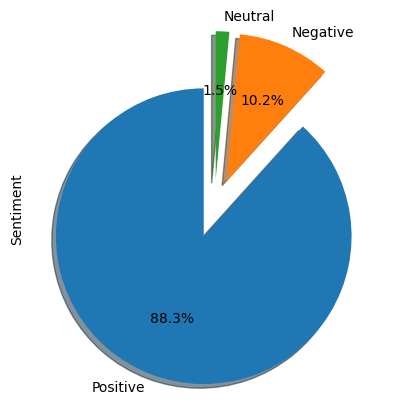

In [44]:
Text_1["Sentiment"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, explode=(0.2, 0.2, 0.2), startangle=90)
ax.set_title('Percent of each sentiment')

#### 4.0 INTEPRETATION AND CONCLUSION

Analysis shows that there is no correlation between the majority of the factors present in the dataset, and word cloud shows that most used words in this review are product, flavor, love, taste, and good which could be assumed that most of the review is positive. Furthermore, NLP sentiment analysis shows that only 10.2% of the review are negative, 1.5% are neutral while 88.3% are positive. In addition, Amazon should focus on the taste and flavor of consumable goods on it platform, this could help further increase the number of positive review. Also, recommendations can be made to external sellers on Amazon about customers complain and reactions to each product bought.

#### REFERENCES

###### Gupta, S. (2018, January 19). Sentiment analysis: Concept, analysis and applications. Medium. https://towardsdatascience.com/sentiment-analysis-concept-analysis-and-applications-6c94d6f58c17

###### Trupp Global. (2021, September 23). 8 reasons why customer complaints are important for your business. https://www.truppglobal.com/blog/8-reasons-why-customer-complaints-are-important-for-your-business

###### Shah, P. (2020, November 6). My absolute go-to for sentiment Analysis — TextBlob. Medium. https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524

###### TechVidvan. (2021). Sentiment Analysis using Python [with source code]. TechVidvan.com. https://techvidvan.com/tutorials/python-sentiment-analysis/